# Import modules et des datas

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
R = input("On est en local ? (Y)")
R = R.upper()

if R == 'Y':
    Path = 'G:/Mon Drive/Colab Notebooks/Projet S3/'
else:
    from google.colab import drive
    drive.mount('/content/drive')
    Path = '/content/drive/MyDrive/Colab Notebooks/Projet S3/'

In [3]:
PathTrain = Path + 'train.csv'
Train = pd.read_csv(PathTrain)

## Analyse de la base

In [4]:
# la taille de train
print(Train.shape)

# Moyenne de la colonnes SalePrice
mean = Train['SalePrice'].mean()
print(mean)

(1460, 81)
180921.19589041095


In [5]:
# Affiche le nombre de valeur différente pour chaque colonne
Train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [6]:
#Affiche les colonnes avec des valeurs manquantes et le nombre de valeurs manquantes
Train.isnull().sum()[Train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# Transforme certaines colonnes en catégorie : YearBuilt, YearRemodAdd, MoSold, YrSold, GarageYrBlt
Train['YearBuilt'] = Train['YearBuilt'].astype('object')
Train['YearRemodAdd'] = Train['YearRemodAdd'].astype('object')
Train['MoSold'] = Train['MoSold'].astype('object')
Train['YrSold'] = Train['YrSold'].astype('object')
Train['GarageYrBlt'] = Train['GarageYrBlt'].astype('object')
# Définir le nombre maximum de lignes à afficher
pd.set_option('display.max_rows', 100)
print(Train.dtypes)
Train.head()

# Affiche le nombre de variables numériques et catégoriques
NombreNum = Train.select_dtypes(include=['int64', 'float64']).shape[1]
NombreCat = Train.select_dtypes(include=['object']).shape[1]
print('Nombre de variables numériques: {}'.format(NombreNum))
print('Nombre de variables catégoriques: {}'.format(NombreCat))

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt         object
YearRemodAdd      object
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


# Nettoyage de la base

In [8]:
# Ajustement de la base
Train['Alley'] = Train['Alley'].fillna('No alley')
Train['BsmtQual'] = Train['BsmtQual'].fillna('No Basement')
Train['BsmtCond'] = Train['BsmtCond'].fillna('No Basement')
Train['BsmtExposure'] = Train['BsmtExposure'].fillna('No Basement')
Train['BsmtFinType1'] = Train['BsmtFinType1'].fillna('No Basement')
Train['BsmtFinType2'] = Train['BsmtFinType2'].fillna('No Basement')
Train['FireplaceQu'] = Train['FireplaceQu'].fillna('No Fireplace')
Train['GarageType'] = Train['GarageType'].fillna('No Garage')
Train['GarageFinish'] = Train['GarageFinish'].fillna('No Garage')
Train['GarageQual'] = Train['GarageQual'].fillna('No Garage')
Train['GarageCond'] = Train['GarageCond'].fillna('No Garage')
Train['GarageYrBlt'] = Train['GarageYrBlt'].fillna('No Garage')
Train['PoolQC'] = Train['PoolQC'].fillna('No Pool')
Train['Fence'] = Train['Fence'].fillna('No Fence')
Train['MiscFeature'] = Train['MiscFeature'].fillna('No feature')
Train['LotFrontage'] = Train['LotFrontage'].fillna(0)
Train['MasVnrType'] = Train['MasVnrType'].fillna('No veneer')

Train.isnull().sum()[Train.isnull().sum()>0]

MasVnrArea    8
Electrical    1
dtype: int64

In [9]:
# Affiche la taille de la base
print(Train.shape)

# drop les lignes avec des valeurs manquantes
Train = Train.dropna()

# Affiche la taille de la base
print(Train.shape)

(1460, 81)
(1451, 81)


In [10]:
# Import de la vrai base de test
PathTest = Path + 'test.csv'
Test = pd.read_csv(PathTest)

# Affiche la taille de la base
print(Test.shape)

# Transforme la colonne Id en index
Test = Test.set_index('Id')

# Ajustement de la base
Test['Alley'] = Test['Alley'].fillna('No alley')
Test['BsmtQual'] = Test['BsmtQual'].fillna('No Basement')
Test['BsmtCond'] = Test['BsmtCond'].fillna('No Basement')
Test['BsmtExposure'] = Test['BsmtExposure'].fillna('No Basement')
Test['BsmtFinType1'] = Test['BsmtFinType1'].fillna('No Basement')
Test['BsmtFinType2'] = Test['BsmtFinType2'].fillna('No Basement')
Test['FireplaceQu'] = Test['FireplaceQu'].fillna('No Fireplace')
Test['GarageType'] = Test['GarageType'].fillna('No Garage')
Test['GarageFinish'] = Test['GarageFinish'].fillna('No Garage')
Test['GarageQual'] = Test['GarageQual'].fillna('No Garage')
Test['GarageCond'] = Test['GarageCond'].fillna('No Garage')
Test['GarageYrBlt'] = Test['GarageYrBlt'].fillna('No Garage')
Test['PoolQC'] = Test['PoolQC'].fillna('No Pool')
Test['Fence'] = Test['Fence'].fillna('No Fence')
Test['MiscFeature'] = Test['MiscFeature'].fillna('No feature')
Test['LotFrontage'] = Test['LotFrontage'].fillna(0)
Test['MasVnrType'] = Test['MasVnrType'].fillna('No veneer')

Test.isnull().sum()[Test.isnull().sum()>0]

# Affiche la taille de la base
print(Test.shape)

# Ici on va centré et réduire les données numériques 
# On va créer une base avec les données numériques
TestNum = Test.select_dtypes(include=['int64', 'float64'])
# On va créer une base avec les données catégorielles
TestCat = Test.select_dtypes(include=['object'])
# On centre et réduit les données numériques
TestNum = (TestNum - TestNum.mean()) / TestNum.std()

# On va créer une base avec les données numériques centrées et réduites et les données catégorielles
TestP = pd.concat([TestNum, TestCat], axis=1)

TestP.head()

(1459, 80)
(1459, 79)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,-0.874411,0.684614,0.363804,-0.750844,0.400629,-0.340828,-1.072517,-0.566973,0.063251,0.516994,...,1961.0,Unf,TA,TA,Y,No Pool,MnPrv,No feature,WD,Normal
1462,-0.874411,0.715606,0.897553,-0.054858,0.400629,-0.439544,-1.214492,0.041046,1.062663,-0.297698,...,1958.0,Unf,TA,TA,Y,No Pool,No Fence,Gar2,WD,Normal
1463,0.061330,0.498660,0.809368,-0.750844,-0.497247,0.843770,0.678509,-0.566973,0.772723,-0.297698,...,1997.0,Fin,TA,TA,Y,No Pool,MnPrv,No feature,WD,Normal
1464,0.061330,0.622629,0.032053,-0.054858,0.400629,0.876675,0.678509,-0.454377,0.357583,-0.297698,...,1998.0,Fin,TA,TA,Y,No Pool,No Fence,No feature,WD,Normal
1465,1.464941,-0.462102,-0.971475,1.337113,-0.497247,0.679242,0.394559,-0.566973,-0.387033,-0.297698,...,1992.0,RFn,TA,TA,Y,No Pool,No Fence,No feature,WD,Normal


# Modèle stupide (Moyenne)

In [11]:
PathSub = Path + 'sample_submission.csv'

Sub = pd.read_csv(PathSub)

Sub.head()

# Rempalcer les valeurs de la colonne SalePrice par la moyenne
Sub['SalePrice'] = mean

Sub.head()

# Sauvegarder le fichier
Sub.to_csv(Path + 'submission.csv', index=False)

# Redimentionnement de la base

In [12]:
# Ici on va centré et réduire les données numériques 

#Transforme iD en objet
Train['Id'] = Train['Id'].astype('object')

# On va créer une base avec les données numériques
TrainNum = Train.select_dtypes(include=['int64', 'float64'])

# On va créer une base avec les données catégorielles
TrainCat = Train.select_dtypes(include=['object'])

# On centre et réduit les données numériques
TrainNum = (TrainNum - TrainNum.mean()) / TrainNum.std()

# On va créer une base avec les données numériques centrées et réduites et les données catégorielles
TrainP = pd.concat([TrainCat, TrainNum], axis=1)

# Sauvegarde de la base dans un fichier csv TrainP
TrainP.to_csv(Path + 'TrainP.csv', index=False)

TrainP.head()

,Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,RL,Pave,No alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0.313879,0.352403,-0.752672,0.220671,-0.359239,-0.116664,-0.271013,-0.068882,-0.087931,0.351471
1,2,RL,Pave,No alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0.313879,-0.058482,1.623025,-0.702730,-0.359239,-0.116664,-0.271013,-0.068882,-0.087931,0.011044
2,3,RL,Pave,No alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0.313879,0.632552,-0.752672,-0.066946,-0.359239,-0.116664,-0.271013,-0.068882,-0.087931,0.540597
3,4,RL,Pave,No alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1.649477,0.791303,-0.752672,-0.172910,4.091881,-0.116664,-0.271013,-0.068882,-0.087931,-0.512205
4,5,RL,Pave,No alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,1.649477,1.697119,0.777979,0.568838,-0.359239,-0.116664,-0.271013,-0.068882,-0.087931,0.874720


# Analyse des variables

On va réaliser une table des corrélations pour voir si on peut deja voir des choses

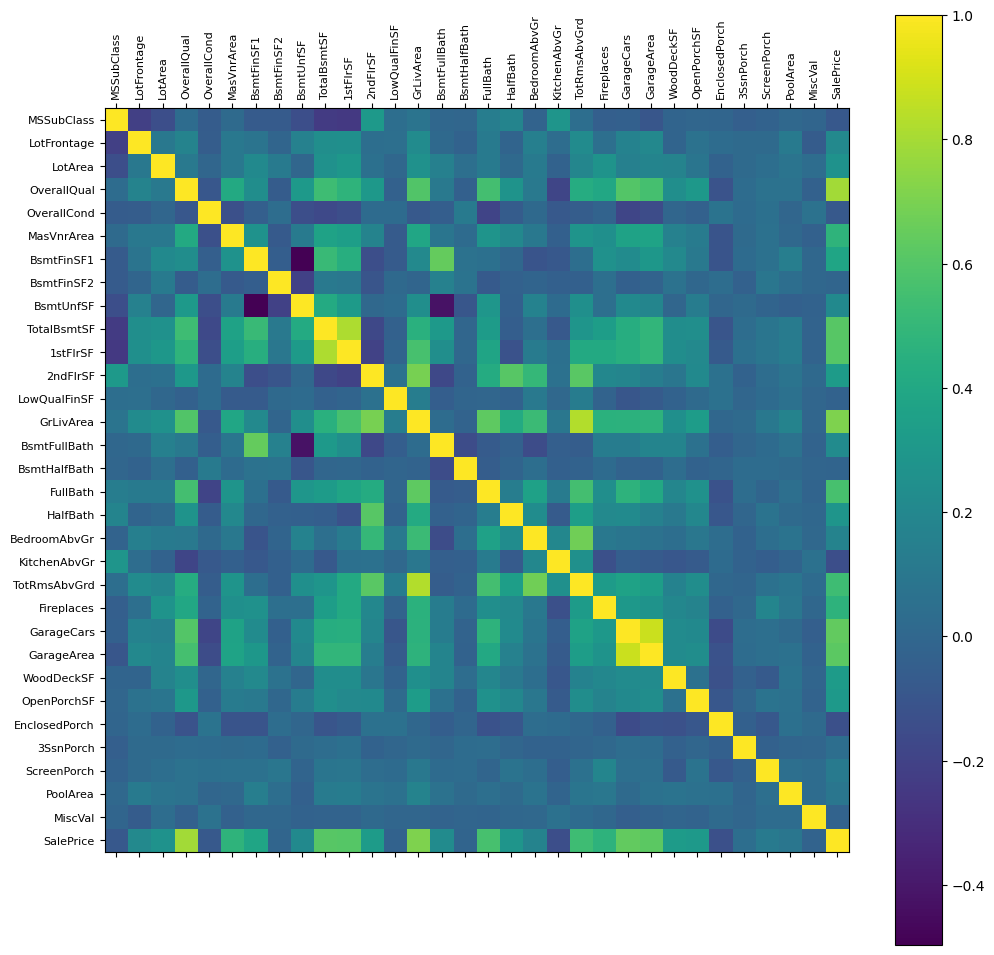

In [13]:
# Création d'une table de corrélation avec les variables numériques
# Création d'une table avec les variables numériques
Train_num = Train.select_dtypes(include=[np.number])
corr = Train_num.corr()
# Affiche la table de corrélation avec de la couleur
plt.figure(figsize=(12,12))  # Taille de la figure
plt.matshow(corr, fignum=1) 
# Ajustement des étiquettes
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical', fontsize=8)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8)
plt.colorbar()
plt.show()


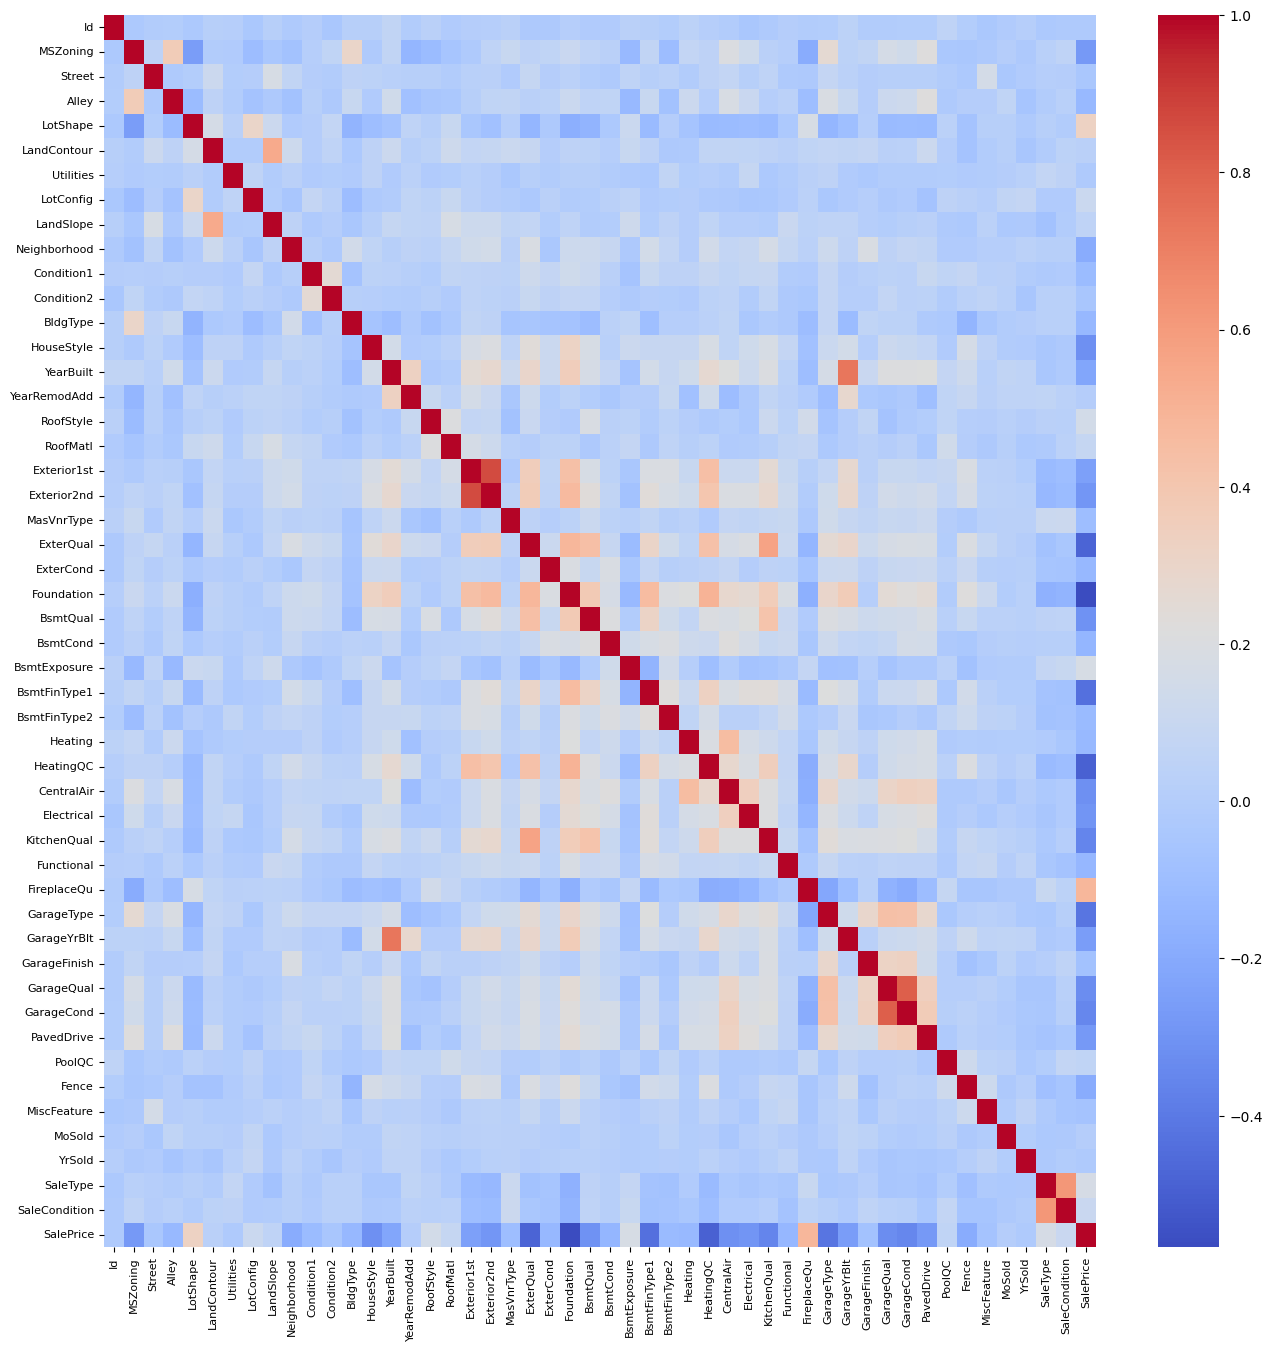

In [14]:
# Récupération des variables catégorielles
Train_cat = Train.select_dtypes(include=['object'])

# Conversion des variables catégorielles en variables codées par des rangs
Train_cat_encoded = Train_cat.apply(lambda x: pd.factorize(x)[0])

# Ajout d'une variable quantitative, par exemple 'quant_var'
Train_quant = Train['SalePrice'].rank()

# Concaténation des variables qualitatives et de la variable quantitative
combined_data = pd.concat([Train_cat_encoded, Train_quant], axis=1)

# Calcul de la corrélation de Spearman
corr2 = combined_data.corr(method='spearman')

# Affichage de la table de corrélation avec des couleurs
plt.figure(figsize=(16, 16))  # Définition de la taille de la figure
sns.heatmap(corr2, annot=False, cmap='coolwarm', fmt=".2f")  # Utilisation de seaborn pour une meilleure visualisation
plt.xticks(rotation='vertical', fontsize=8)
plt.yticks(fontsize=8)
plt.show()

On va réaliser une AFDM. Cela sur R par facilité d'utilisation.

On voit qu'on capture 6% avec les 2 premieres dimentions ce qui est vraiment peu. On va donc devoir réduire le nombre de dimention comme on peut s'en douter.

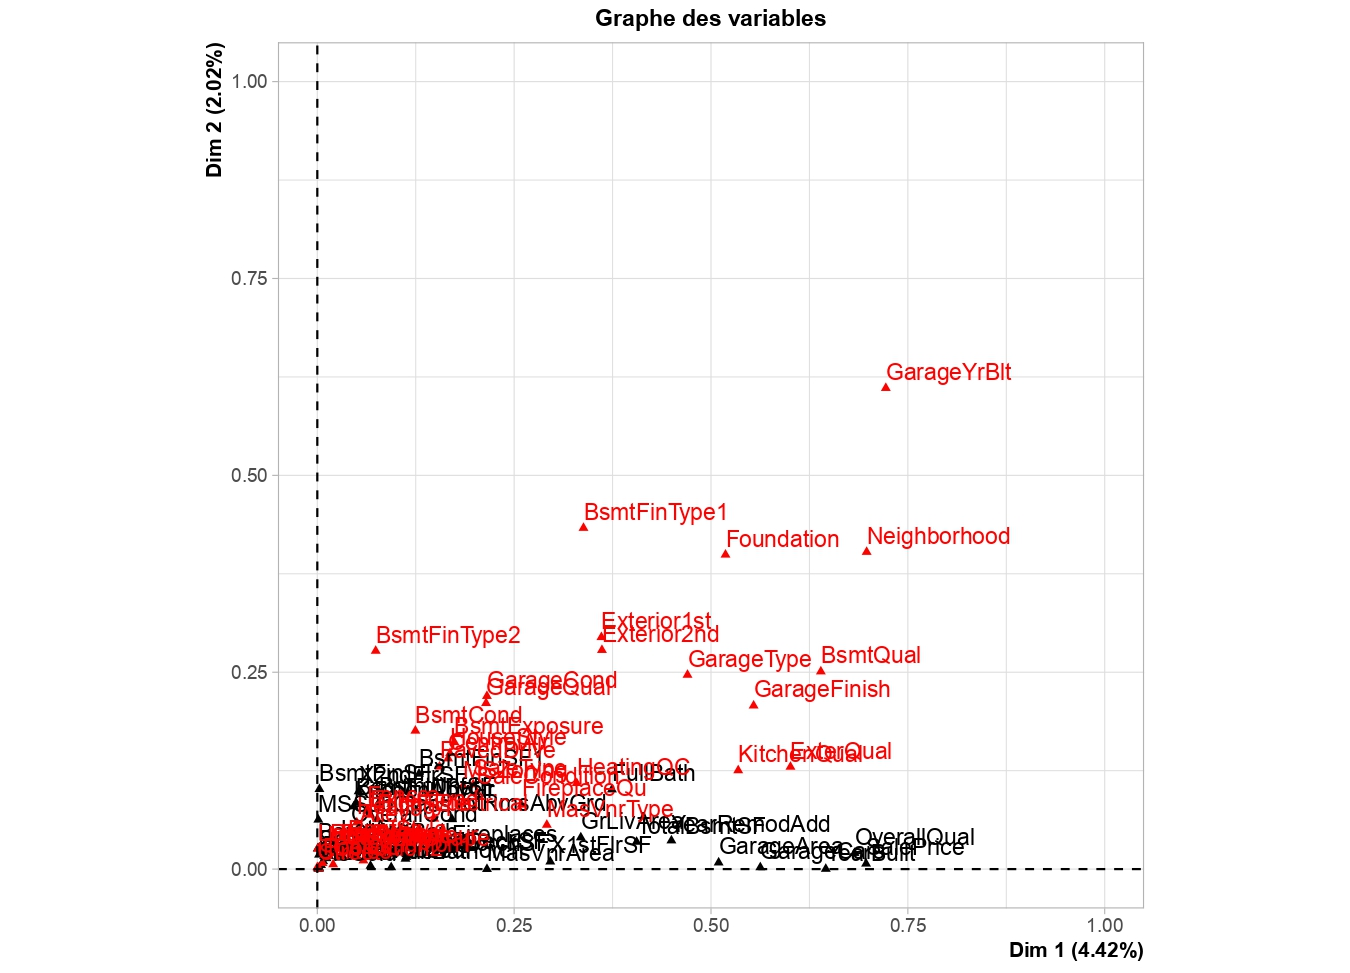

In [15]:
Image(filename=Path + 'GraphVar.jpg')

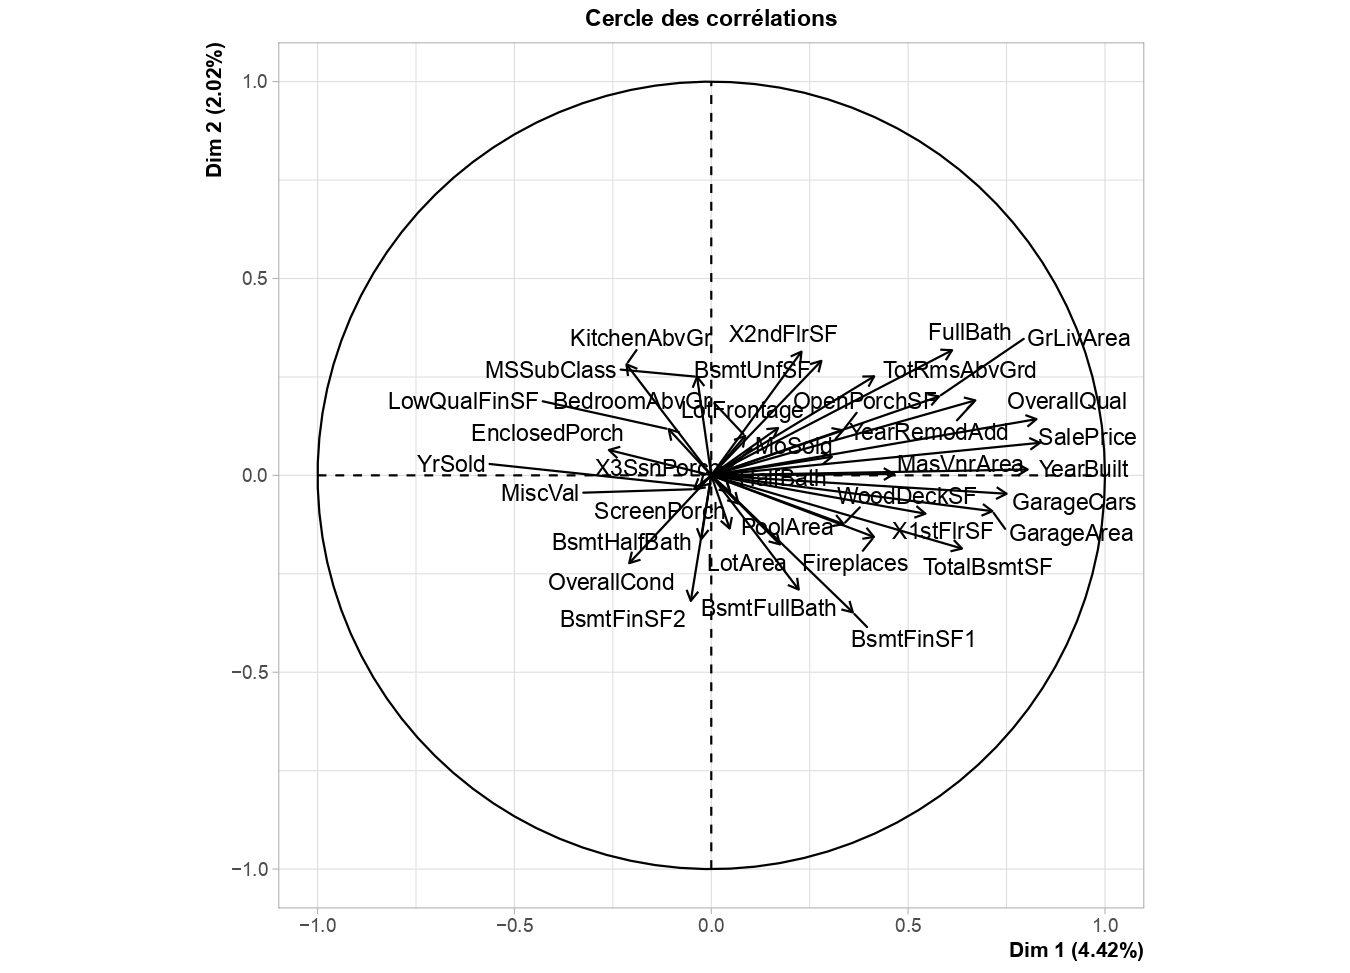

In [16]:
Image(filename=Path + 'GraphQuanti.jpg')

Selections des variables. Par exemple, on pourrait prendre toutes les varibles qui ont un corrélation supérieur à 0.6 avec saleprice

In [17]:
# On garde le nom des variables qui ont une corrélation supérieure ou inférieur à 0.6 avec SalePrice qu'on mets dans une liste
print(corr['SalePrice'])

# On garde le nom des variables qui ont une corrélation supérieure ou inférieur à 0.6 avec SalePrice qu'on mets dans une liste
Garder = []

for i in corr['SalePrice']:
    if i > 0.6 or i < -0.6:
        Garder.append(corr['SalePrice'][corr['SalePrice'] == i].index[0])

# Suppression de la derniere colonne qui est SalePrice
Garder = Garder[:-1]

for i in corr2['SalePrice']:
    if i > 0.6 or i < -0.6:
        Garder.append(corr2['SalePrice'][corr2['SalePrice'] == i].index[0])

Garder = Garder[:-1]

print(Garder)

MSSubClass      -0.082760
LotFrontage      0.208453
LotArea          0.264668
OverallQual      0.790085
OverallCond     -0.076361
MasVnrArea       0.477486
BsmtFinSF1       0.383995
BsmtFinSF2      -0.010350
BsmtUnfSF        0.215707
TotalBsmtSF      0.613299
1stFlrSF         0.606969
2ndFlrSF         0.322840
LowQualFinSF    -0.025277
GrLivArea        0.710073
BsmtFullBath     0.224988
BsmtHalfBath    -0.016021
FullBath         0.562710
HalfBath         0.282331
BedroomAbvGr     0.171956
KitchenAbvGr    -0.137447
TotRmsAbvGrd     0.536366
Fireplaces       0.468973
GarageCars       0.639749
GarageArea       0.622484
WoodDeckSF       0.324658
OpenPorchSF      0.311244
EnclosedPorch   -0.128826
3SsnPorch        0.045235
ScreenPorch      0.113017
PoolArea         0.093102
MiscVal         -0.020961
SalePrice        1.000000
Name: SalePrice, dtype: float64
['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']


# Modèle de régression linéaire

## Modèle avec selection des variables ayant une corrélation supérieur à 0.6

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     571.3
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:38:08   Log-Likelihood:                -13948.
No. Observations:                1160   AIC:                         2.791e+04
Df Residuals:                    1153   BIC:                         2.794e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.805e+05   1188.772    151.842

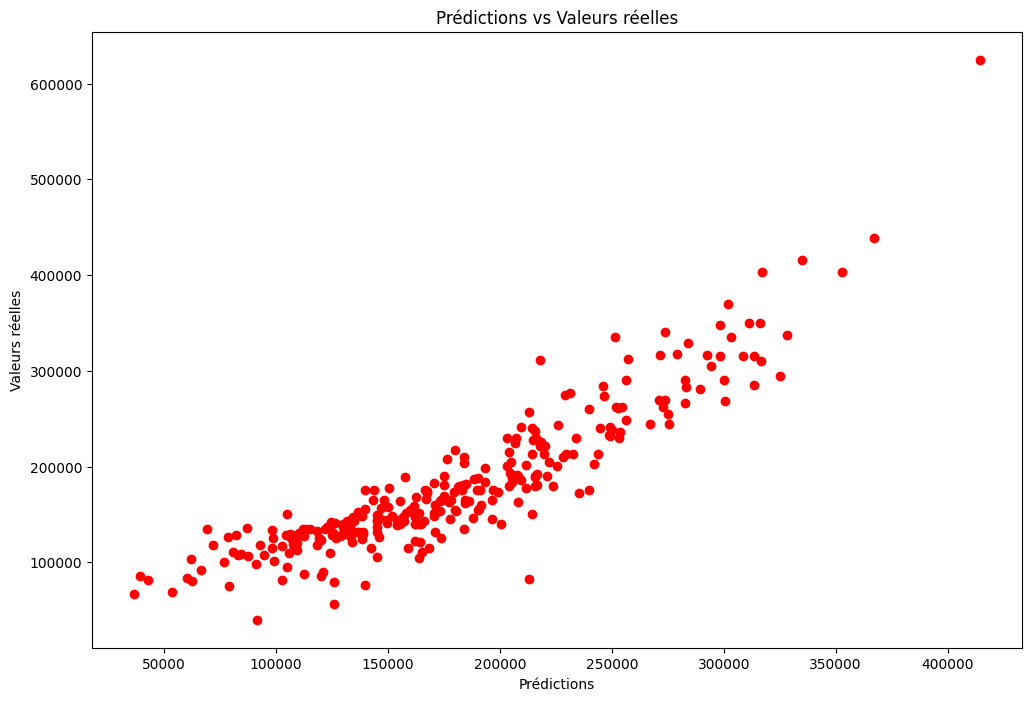

In [18]:
Base = TrainP[Garder]
Base = pd.concat([Base, Train['SalePrice']], axis=1) # On ajoute la variable SalePrice à la base

# Division de la base en deux bases : une base d'apprentissage et une base de test
Entrai, Veri = train_test_split(Base, test_size=0.2, random_state=42)

# Assurez-vous que tous les noms de variable dans 'Garder' sont correctement formatés
Garder_formate = ['Q("{}")'.format(var) if var[0].isdigit() else var for var in Garder]

# Création du modèle avec les noms de variables formatés
model = ols('SalePrice ~ ' + ' + '.join(Garder_formate), data=Entrai).fit()

# Affichage du résumé du modèle
print(model.summary())

# Affichage des résidus
fig = plt.figure(figsize=(12,8))

# Prédiction sur l'ensemble de test
pred = model.predict(Veri)

# Afficher les prédictions
plt.plot(pred, Veri['SalePrice'], 'ro')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Prédictions vs Valeurs réelles')
plt.show()


In [19]:
# Ajoute une colonne ecart
Veri['ecart'] = round(Veri['SalePrice'] - pred,0)

# Ajoute une colonne pred
Veri['pred'] = round(pred,0)

# Comparaison des prédictions et des valeurs réelles sous forme de tableau
Veri[['SalePrice','pred','ecart']].head(10)

,SalePrice,pred,ecart
540,315000,313521.0,1479.0
757,158900,161683.0,-2783.0
49,127000,112499.0,14501.0
1456,210000,228034.0,-18034.0
141,260000,239811.0,20189.0
616,183200,170451.0,12749.0
1056,185850,209487.0,-23637.0
796,143500,165895.0,-22395.0
1012,165000,148263.0,16737.0
1332,100000,76760.0,23240.0


In [20]:
# On garde de TestP que les variables garder
TestPM1 = TestP[Garder]
TestPM1.head()

# Prédiction sur la base de test
pred = model.predict(TestPM1)

# Transformer les prédictions en DataFrame
pred = pd.DataFrame(pred)

pred.head()

# Renommer la colonne 0 en SalePrice 
pred = pred.rename(columns={0: 'SalePrice'})

# Remplacer les valeurs manquantes par la moyenne
pred['SalePrice'] = pred['SalePrice'].fillna(mean)

# Ajoute une colonne Id qui copie l'index
pred['Id'] = pred.index 

# suppression de l'index
pred = pred.reset_index(drop=True)

# Inversion des colonnes
pred = pred[['Id','SalePrice']]

# Affichage des prédictions sous forme de tableau
pred.head()


,Id,SalePrice
0,1461,112875.229011
1,1462,165945.536306
2,1463,160507.713409
3,1464,182243.280775
4,1465,226351.425271


In [21]:
# Sauvegarde de la base dans un fichier csv
pred.to_csv(Path + 'Submission_Modele.csv', index=False)

## Affinement

In [22]:
# Si il y a SalePrice alors suppression de la colonne SalePrice
if 'SalePrice' in TrainP.columns:
    TrainP = TrainP.drop(['SalePrice'], axis=1)

In [23]:
TrainDate = TrainP.copy()

Tra = pd.read_csv(PathTrain)

# Supprime certaines colonnes : YearBuilt, YearRemodAdd, MoSold, YrSold, GarageYrBlt
TrainDate = TrainDate.drop(['YearBuilt'], axis=1)
TrainDate = TrainDate.drop(['YearRemodAdd'], axis=1)
TrainDate = TrainDate.drop(['MoSold'], axis=1)
TrainDate = TrainDate.drop(['YrSold'], axis=1)
TrainDate = TrainDate.drop(['GarageYrBlt'], axis=1)

# Ajoutes les colonnes : YearBuilt, YearRemodAdd, MoSold, YrSold, GarageYrBlt à la base depuis train en faisait une jointure sur l'Id
TrainDate = pd.merge(TrainDate, Tra[['Id','YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt']], on='Id', how='left')

# Affiche les distinct de GarageYrBlt
TrainDate['GarageYrBlt'].unique()

# Convertion de GarageYrBlt en int64
TrainDate['GarageYrBlt'] = TrainDate['GarageYrBlt'].fillna(0).astype('int64') # On remplace les valeurs manquantes par 0
TrainDate['GarageYrBlt'] = TrainDate['GarageYrBlt'].astype('int64')

# On drop les 0 de GarageYrBlt
TrainDate = TrainDate[TrainDate['GarageYrBlt'] != 0]

TrainDate.head()
TrainDate.dtypes

Id                object
MSZoning          object
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinType2      object
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
KitchenQual       object
Functional        object
FireplaceQu       object
GarageType        object
GarageFinish      object
GarageQual        object
GarageCond        object
PavedDrive        object
PoolQC            object


24171.846299404737


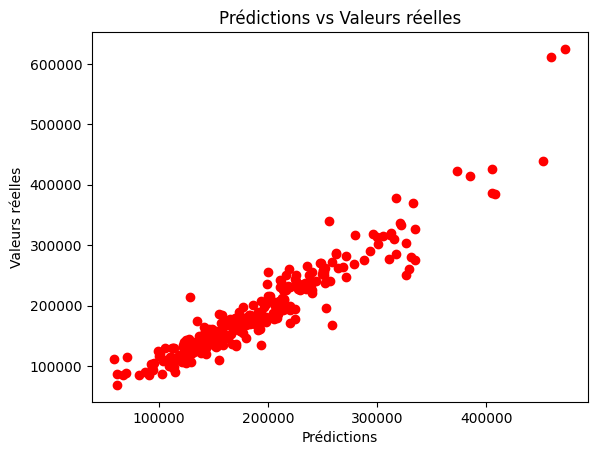

In [24]:
# Liste avec toutes les variables
Tout = TrainDate.columns.tolist()

# Séparation des variables en catégorielles et quantitatives
variables_catégorielles = [var for var in Tout if TrainDate[var].dtype == 'object']
variables_quantitatives = [var for var in Tout if TrainDate[var].dtype != 'object']

# AJout de la colonne SalePrice à la base TrainDate en faisant une jointure sur l'Id
Base2 = pd.merge(TrainDate, Tra[['Id','SalePrice']], on='Id', how='left')

# Division de la base en deux bases : une base d'apprentissage et une base de test
Entrai, Veri = train_test_split(Base2, test_size=0.2, random_state=42)

# Création d'un impute pour gérer les valeurs manquantes
impute = SimpleImputer(strategy='mean')  # Vous pouvez changer la stratégie si nécessaire

# Création du transformateur de colonnes avec OneHotEncoder pour les variables catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(impute, 'passthrough'), variables_quantitatives),
        ('cat', OneHotEncoder(handle_unknown='ignore'), variables_catégorielles)
    ])

# Création du modèle de régression linéaire
model = make_pipeline(preprocessor, LinearRegression())

# Entraînement du modèle
model.fit(Entrai[Tout], Entrai['SalePrice'])

# Prédiction sur l'ensemble de test
pred = model.predict(Veri[Tout])

# Calcul BIC
n = len(Entrai)
p = len(Tout)
BIC = n*np.log(mean_squared_error(Veri['SalePrice'], pred)) + p*np.log(n)
print(BIC)

# Les prédictions en dessous de 1000 sont remplacées par la moyenne
pred[pred < 1000] = Veri['SalePrice'].mean()
pred[pred > 700000] = Veri['SalePrice'].mean()

# Afficher les prédictions
plt.plot(pred, Veri['SalePrice'], 'ro')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Prédictions vs Valeurs réelles')
plt.show()


In [25]:
Tout2 = Tout
Tout2 = Tout2[1:]

# Sélection stepwise
variables_ajoutées = []
critère_meilleur = float('inf')  
variables_restantes = Tout2.copy()

while variables_restantes:
    critère_temporaire = float('inf')
    meilleure_variable = None
    
    for variable in variables_restantes:
        variables_à_tester = variables_ajoutées + [variable]
        
        # Préparation du modèle avec les variables sélectionnées
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', make_pipeline(impute, 'passthrough'), [v for v in variables_à_tester if v in variables_quantitatives]),
                ('cat', OneHotEncoder(handle_unknown='ignore'), [v for v in variables_à_tester if v in variables_catégorielles])
            ])
        model = make_pipeline(preprocessor, LinearRegression())

        # Entraînement et évaluation du modèle
        model.fit(Entrai[variables_à_tester], Entrai['SalePrice'])
        pred = model.predict(Veri[variables_à_tester])
        n = len(Entrai)
        p = len(variable)
        BIC = n*np.log(mean_squared_error(Veri['SalePrice'], pred)) + p*np.log(n)
        critère = BIC  # Remplacez par votre critère de performance

        # Vérifiez si ce modèle est meilleur
        if critère < critère_temporaire:
            critère_temporaire = critère
            meilleure_variable = variable

    # Vérifiez si l'ajout de la meilleure variable améliore le modèle
    if critère_temporaire < critère_meilleur:
        critère_meilleur = critère_temporaire
        print("Meilleur critère:", critère_meilleur)
        variables_ajoutées.append(meilleure_variable)
        variables_restantes.remove(meilleure_variable)
        print("Meilleur variable:", variables_ajoutées)

        """         # Ajout d'une étape de backward
        # Parmi les meilleures variables, on en prend une et on la supprime
        for variable in variables_ajoutées:
            variables_à_tester = variables_ajoutées
            variables_à_tester.remove(variable)
            if variables_à_tester != []:
                # Préparation du modèle avec les variables sélectionnées
                preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', make_pipeline(impute, 'passthrough'), [v for v in variables_à_tester if v in variables_quantitatives]),
                        ('cat', OneHotEncoder(handle_unknown='ignore'), [v for v in variables_à_tester if v in variables_catégorielles])
                    ])
                model = make_pipeline(preprocessor, LinearRegression())

                # Entraînement et évaluation du modèle
                model.fit(Entrai[variables_à_tester], Entrai['SalePrice'])
                pred = model.predict(Veri[variables_à_tester])
                n = len(Entrai)
                p = len(variable)
                BIC = n*np.log(mean_squared_error(Veri['SalePrice'], pred)) + p*np.log(n)
                critère = BIC

                # Vérifiez si ce modèle est meilleur
                if critère < critère_temporaire:
                    critère_temporaire = critère
                    meilleure_variable = variables_à_tester """

        # Vérifiez si la suppression de la meilleure variable améliore le modèle
        if critère_temporaire < critère_meilleur:
            critère_meilleur = critère_temporaire
            print("Meilleur critère:", critère_meilleur)
            variables_ajoutées.remove(meilleure_variable)
            variables_restantes.append(meilleure_variable)
            print("Meilleur variable:", variables_ajoutées)

    else:
        break

# Votre modèle final est maintenant basé sur les variables dans `variables_ajoutées`
print("Variables sélectionnées pour le modèle final:", variables_ajoutées)


Meilleur critère: 23757.264897598874
Meilleur variable: ['OverallQual']
Meilleur critère: 23467.455182061294
Meilleur variable: ['OverallQual', 'Neighborhood']
Meilleur critère: 23330.474058089105
Meilleur variable: ['OverallQual', 'Neighborhood', 'BldgType']
Meilleur critère: 23228.142775341395
Meilleur variable: ['OverallQual', 'Neighborhood', 'BldgType', 'BsmtQual']
Meilleur critère: 23157.63663165907
Meilleur variable: ['OverallQual', 'Neighborhood', 'BldgType', 'BsmtQual', 'TotRmsAbvGrd']
Meilleur critère: 23087.71190712073
Meilleur variable: ['OverallQual', 'Neighborhood', 'BldgType', 'BsmtQual', 'TotRmsAbvGrd', 'BsmtFinType1']
Meilleur critère: 23027.912282085275
Meilleur variable: ['OverallQual', 'Neighborhood', 'BldgType', 'BsmtQual', 'TotRmsAbvGrd', 'BsmtFinType1', 'LotConfig']
Meilleur critère: 22998.354224811552
Meilleur variable: ['OverallQual', 'Neighborhood', 'BldgType', 'BsmtQual', 'TotRmsAbvGrd', 'BsmtFinType1', 'LotConfig', 'FullBath']
Meilleur critère: 22978.05327192

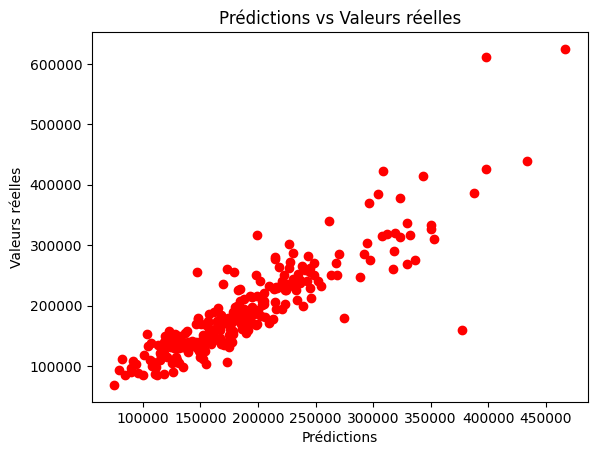

In [26]:
# Afficher les prédictions
plt.plot(pred, Veri['SalePrice'], 'ro')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Prédictions vs Valeurs réelles')
plt.show()

In [27]:
# On garde de TestP que les variables garder
TestPM2 = TestP[variables_ajoutées]

# Jointure entre TestPM2 et Tra sur l'Id pour ajouter la colonne SalePrice

TestPM2.head()



,OverallQual,Neighborhood,BldgType,BsmtQual,TotRmsAbvGrd,BsmtFinType1,LotConfig,FullBath,Fence
Id,,,,,,,,,
1461,-0.750844,NAmes,1Fam,TA,-0.918020,Rec,Inside,-1.028367,MnPrv
1462,-0.054858,NAmes,1Fam,TA,-0.255283,ALQ,Corner,-1.028367,No Fence
1463,-0.750844,Gilbert,1Fam,Gd,-0.255283,GLQ,Inside,0.772818,MnPrv
1464,-0.054858,Gilbert,1Fam,TA,0.407454,GLQ,Inside,0.772818,No Fence
1465,1.337113,StoneBr,TwnhsE,Gd,-0.918020,ALQ,Inside,0.772818,No Fence


In [28]:
Vari = variables_ajoutées

# Préparation du modèle avec les variables sélectionnées
preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(impute, 'passthrough'), [v for v in Vari if v in variables_quantitatives]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), [v for v in Vari if v in variables_catégorielles])
    ])
model = make_pipeline(preprocessor, LinearRegression())

# Entraînement et évaluation du modèle
model.fit(Entrai[Vari], Entrai['SalePrice'])
pred = model.predict(TestPM2[variables_à_tester])

# Afficher les prédictions dans un tableau
pred = pd.DataFrame(pred)
pred = pred.rename(columns={0: 'SalePrice'})
pred['Id'] = pred.index
pred = pred.reset_index(drop=True)
pred = pred[['Id','SalePrice']]
# Ajoute 1460 à l'Id
pred['Id'] = pred['Id'] + 1461

# Sauvegarde de la base dans un fichier csv
pred.to_csv(Path + 'Submission_Modele_Forward.csv', index=False)

pred.head()

KeyError: "['GarageYrBlt'] not in index"

In [ ]:
Vari = variables_ajoutées
print(Vari)

['Neighborhood', 'BsmtQual', 'TotRmsAbvGrd', 'BldgType', 'BsmtFinType1', 'LotConfig', 'FullBath', 'Fence']


In [ ]:
TestPM2.head()

,Neighborhood,BsmtQual,TotRmsAbvGrd,BldgType,BsmtFinType1,LotConfig,FullBath,Fence
Id,,,,,,,,
1461,NAmes,TA,-0.918020,1Fam,Rec,Inside,-1.028367,MnPrv
1462,NAmes,TA,-0.255283,1Fam,ALQ,Corner,-1.028367,No Fence
1463,Gilbert,Gd,-0.255283,1Fam,GLQ,Inside,0.772818,MnPrv
1464,Gilbert,TA,0.407454,1Fam,GLQ,Inside,0.772818,No Fence
1465,StoneBr,Gd,-0.918020,TwnhsE,ALQ,Inside,0.772818,No Fence
